In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Ad Click Data.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [4]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0.0,Brazil,6/3/2016 21:43,1


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [7]:
df.shape

(1000, 10)

In [8]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

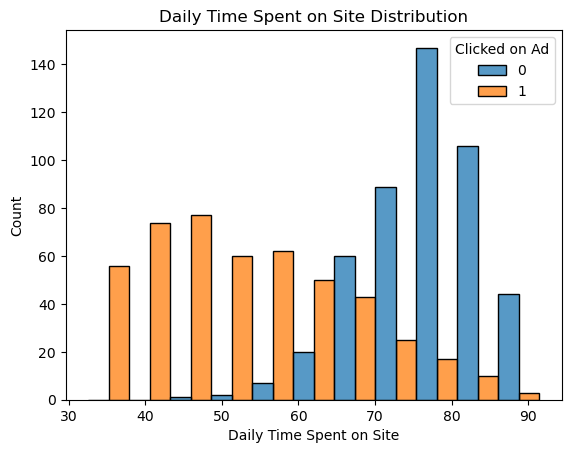

In [11]:
sns.histplot(df, x="Daily Time Spent on Site", hue="Clicked on Ad", multiple="dodge").set(title="Daily Time Spent on Site Distribution")
plt.show()

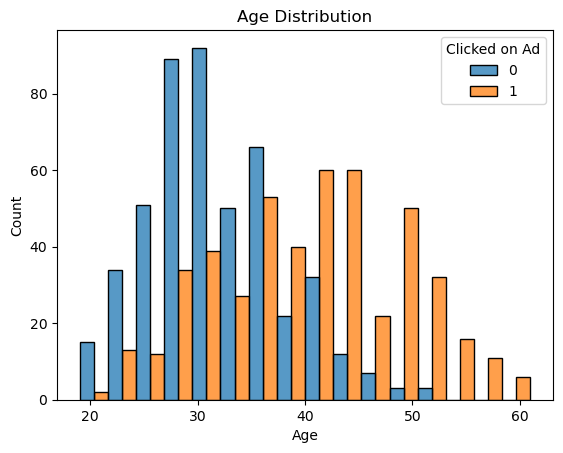

In [12]:
sns.histplot(df, x="Age", hue="Clicked on Ad", multiple="dodge").set(title="Age Distribution")
plt.show()

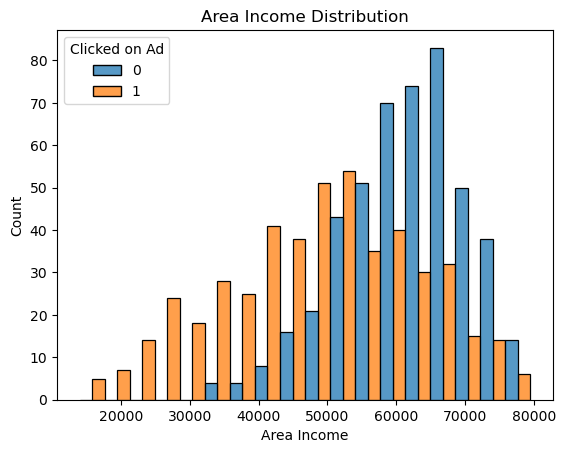

In [13]:
sns.histplot(df, x="Area Income", hue="Clicked on Ad", multiple="dodge").set(title="Area Income Distribution")
plt.show()

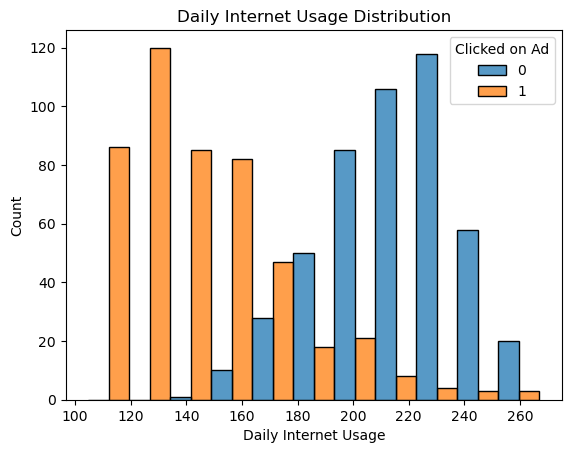

In [14]:
sns.histplot(df, x="Daily Internet Usage", hue="Clicked on Ad", multiple="dodge").set(title="Daily Internet Usage Distribution")
plt.show()

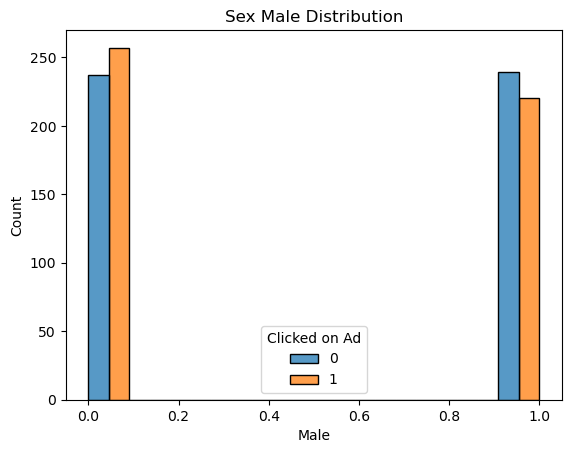

In [15]:
sns.histplot(df, x="Male", hue="Clicked on Ad", multiple="dodge").set(title="Sex Male Distribution")
plt.show()

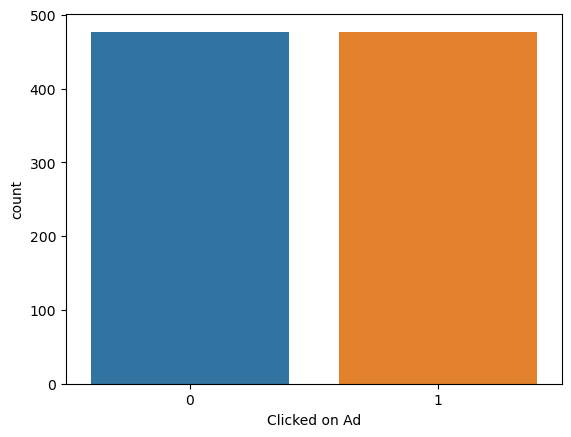

In [16]:
sns.countplot(x='Clicked on Ad', data = df)
plt.show()

In [17]:
countries = df['Country'].value_counts().head(10)
countries

Country
Czech Republic    9
France            8
South Africa      8
Peru              8
Australia         8
Micronesia        8
Afghanistan       8
Turkey            8
Burundi           7
Eritrea           7
Name: count, dtype: int64

In [18]:
countries_that_clicked = df[df['Clicked on Ad']==1]['Country'].value_counts().head(10)
countries_that_clicked

Country
Australia        7
Turkey           7
Ethiopia         7
South Africa     6
Afghanistan      5
Liberia          5
Peru             5
Liechtenstein    5
Hungary          5
Lebanon          4
Name: count, dtype: int64

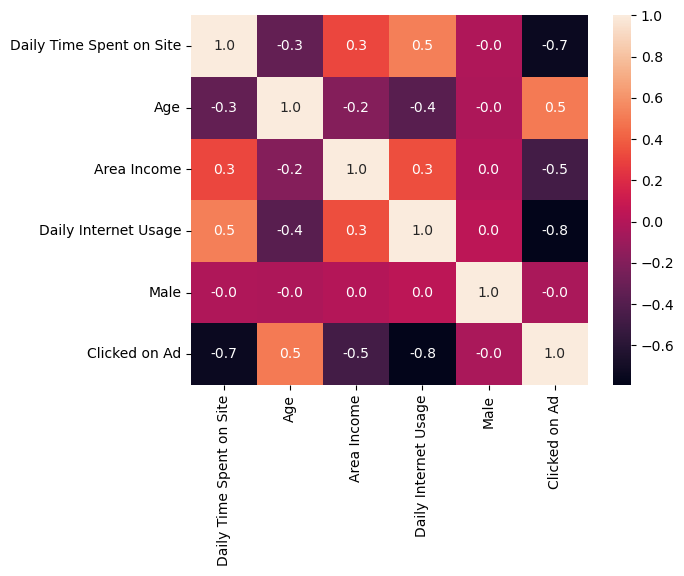

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f')
plt.show()

In [20]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

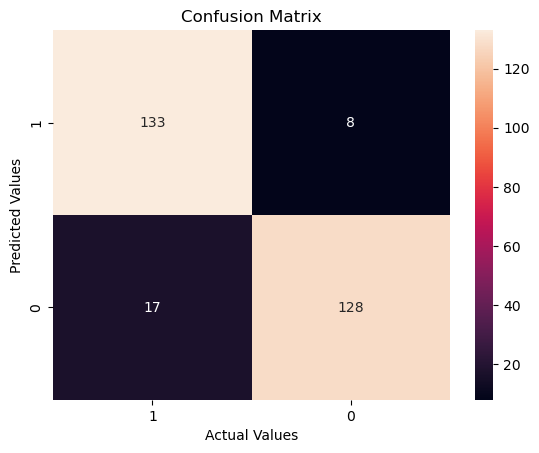

In [24]:
cm = confusion_matrix(y_test, predictions)  
sns.heatmap(cm, annot=True, fmt='g',xticklabels=['1','0'], yticklabels=['1','0']).set(xlabel="Actual Values", ylabel="Predicted Values", title="Confusion Matrix")
plt.show()

In [25]:
# No. of True Positives = 133
# No. of False Positives = 8
# No. of False Negatives = 17
# No. of True Negatives = 128

# PRECISION = TP/(TP + FP) = 0.943
# RECALL = TP/(TP + FN) = 0.887
# ACCURACY = (TP + TN)/(TP + TN + FP + FN) = 0.912
# F-MEASURE = (2*RECALL*PRECISION)/(RECALL + PRECISION) = 0.914